### Imports

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Load the beta-VAE module
import bvae_model as bvae
import spectrum_preprocessing as sp

### Load raw spectra

In [3]:
#your path

path = "C:/Users/Zach/Documents/GitHub/betaVAE_Training/training_data/SMP65#010 70d 820um.csv"


In [4]:
filename = path.split("/")[-1]
filename

'SMP65#010 70d 820um.csv'

In [5]:
df = pd.read_csv(path, skiprows=[1,2])  # Skip metadata rows if present

if df.isnull().values.any():
    df = df.fillna(method='ffill').fillna(method='bfill')

print(f"Dataframe shape: {df.shape}")

Dataframe shape: (6144, 2100)


In [6]:
df

,map_x,map_y,Sample Name,1981.7 - 2095.8,3997.9328286151754,3996.348861567388,3994.7648945196006,3993.1809274718134,3991.5969604240263,3990.0129933762387,...,693.7775669308426,692.1935998830554,690.6096328352678,689.0256657874806,687.4416987396935,685.8577316919059,684.2737646441187,682.6897975963311,681.105830548544,679.5218635007568
0,40253.0,23554.2,820um 70d,3.54994,0.118277,0.115900,0.113800,0.113819,0.115067,0.115344,...,-0.876032,-0.579970,-0.486324,-0.629172,-0.803402,-0.863851,-0.970198,-0.715451,-0.628538,-0.579521
1,40258.4,23554.2,820um 70d,3.43524,0.122164,0.120855,0.121040,0.121213,0.120598,0.120691,...,-0.118523,-0.262004,-0.338740,-0.313184,-0.274171,-0.251199,-0.176292,-0.045483,0.035501,0.024978
2,40263.9,23554.2,820um 70d,3.51870,0.112717,0.113335,0.117527,0.120885,0.119381,0.115208,...,0.159128,0.066974,0.071638,0.127192,0.189715,0.201859,0.118274,-0.019348,-0.120761,-0.071413
3,40269.3,23554.2,820um 70d,3.57578,0.100139,0.099072,0.099017,0.100348,0.101985,0.103395,...,-0.600544,-0.491796,-0.504636,-0.714875,-0.910950,-0.693590,-0.564591,-0.555007,-0.467597,-0.370541
4,40274.7,23554.2,820um 70d,3.56623,0.091773,0.089928,0.088217,0.086368,0.085015,0.084866,...,-0.290196,-0.219288,-0.263144,-0.377425,-0.508661,-0.598203,-0.701536,-0.638301,-0.469249,-0.491776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6139,40573.6,24069.3,820um 70d,3.59903,0.107387,0.107637,0.105830,0.103895,0.103475,0.104259,...,-0.244124,-0.316188,-0.442194,-0.548316,-0.530509,-0.458186,-0.381557,-0.352892,-0.362554,-0.348088
6140,40579.0,24069.3,820um 70d,3.57410,0.126684,0.127736,0.128547,0.129605,0.130513,0.131475,...,-0.487846,-0.403659,-0.422976,-0.578886,-0.705307,-0.778261,-0.838422,-0.783603,-0.827922,-1.284370
6141,40584.4,24069.3,820um 70d,3.52141,0.099440,0.098022,0.096373,0.096497,0.099421,0.103233,...,-0.248144,-0.318128,-0.429255,-0.682080,-1.075010,-0.731156,-0.688904,-0.728419,-0.432510,-0.249158
6142,40589.9,24069.3,820um 70d,3.43472,0.104835,0.103232,0.102622,0.103876,0.105570,0.105982,...,-0.913197,-0.791676,-0.697421,-0.620275,-0.528403,-0.513449,-0.514412,-0.424702,-0.329407,-0.332765


# Sort the wavenumber columns and data and put in a dataframe
- necessary for input to pipeline below

In [7]:
wavenumber = df.columns.values[4:].astype(float)
wavenumber.sort()
wavenumber = wavenumber.astype(str)
spectra_df = df[wavenumber].copy()
np.dtype(spectra_df.columns.values.astype(float)[0])

dtype('float64')

### Run the pipeline
The `bvae.pipeline()` returns the interpolated wavenumber array; the interpolated absorbance array; the beta-model encodings L1 L2 and L3; the reconstruction MSE; and the reconstructed spectrum.

In [8]:
L1_list=[]
L2_list=[]
L3_list=[]
MSE_list=[]
wavenumber_list=[]
absorbance_list=[]
reconstructed_list=[]
for i in range(spectra_df.shape[0]):    
    f = spectra_df.columns.values[:].astype('float32')
    a = spectra_df.iloc[i,:].values
    try:
        wavenumber, absorbance, encodings, mse, reconstructed = bvae.bvae_pipeline(f, a)
        L1 = encodings[0]
        L2 = encodings[1]
        L3 = encodings[2]
    except Exception as e:
        print(e)
        L1 = 0
        L2 = 0
        L3 = 0
        mse = 100
        reconstructed = np.zeros(len(wavenumber))
        
    L1_list.append(L1)
    L2_list.append(L2)
    L3_list.append(L3)
    MSE_list.append(mse)
    absorbance_list.append(absorbance)
    reconstructed_list.append(reconstructed)
    
    #print(encodings)
    #print(mse)


airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: max iteration reached!
airpls: 

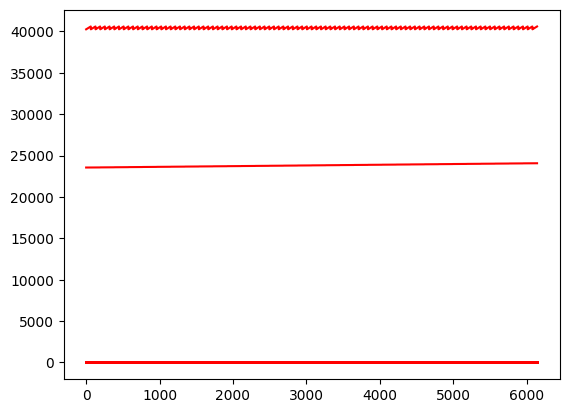

ValueError: Unable to coerce to Series, length must be 1065: given 1063

In [ ]:
plt.plot(absorbance,c='b')
plt.plot(reconstructed,c='r')
plt.show()

plt.plot(wavenumber, absorbance-reconstructed,c='g')
#plt.plot(wavenumber, absorbance-reconstructed,c='g')
plt.show()

plt.plot(encodings[0])
plt.plot(encodings[1])
plt.plot(encodings[2])
plt.show()

# Save results to dataframe

In [ ]:
hyperspectrum =pd.DataFrame(absorbance_list)
hyperspectrum.columns = wavenumber
hyperspectrum['map_x'] = df['map_x'].values
hyperspectrum['map_y'] = df['map_y'].values

In [ ]:
reconstructed =pd.DataFrame(reconstructed_list)
reconstructed.columns = wavenumber
reconstructed['map_x'] = df['map_x'].values
reconstructed['map_y'] = df['map_y'].values

In [ ]:
bvae_df =pd.DataFrame()
bvae_df['map_x'] = df['map_x'].values
bvae_df['map_y'] = df['map_y'].values
bvae_df['L1'] = L1_list
bvae_df['L2'] = L2_list
bvae_df['L3'] = L3_list
bvae_df['MSE'] = MSE_list

# Save to csv files for viewing in Quasar

In [ ]:

path_to_save = 'C:/Users/Zach/Documents/BVAE_processed/'
os.makedirs(path_to_save, exist_ok=True)
bvae_df.to_csv(path_to_save +'bvae_'+filename)

In [ ]:
path_to_save = "C:/Users/Zach/Documents/Hyperspectra/"
os.makedirs(path_to_save, exist_ok=True)
file=os.path.join(path_to_save + 'hyperspectrum_'+filename)
hyperspectrum.to_csv(file, index=False)

In [ ]:
path_to_save = "C:/Users/Zach/Documents/Reconstructions/"
os.makedirs(path_to_save, exist_ok=True)
reconstructed.to_csv(path_to_save +'reconstructed_'+filename, index=False)